# 🚜 Predicting the sale Price of bulldozer-price-regression

Machine Learning project with the gold of predicting the sale price of bulldozers.

## 1. Promblem difination

How well can we predict the future sale price of a bulldozer,given its characteristics and previous examples of how similar bulldoxers have been sold for?

## 2. Data

The data dowloaded from the Kaggle Bluebook for Bulldozers
Competition: https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

- Train.csv is the training set, which contains data through the end of 2011.
- Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
- Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.



## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.


Note:The goal for most regression evaluation metrics is to minimize the error.For example,our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features

Kaggle provide a date dictionary detailing all of the feature of the dataest . You view this data dictionary on Google sheets

In [1]:
import datetime

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2023-12-09 18:53:36.941144


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
#  Import training and validation sets 

df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False) # put low_memory to skipe a warning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

- Since sale date is a date we needed to do pass it as a date

- We have missing value on UsageBand is 73670

In [5]:
#check missing value

df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

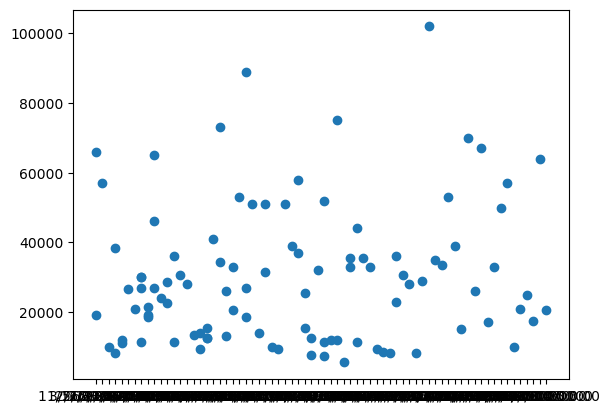

In [6]:
# set up plot to take a look easy can make in any style to make it easy to read data

fig, ax = plt.subplots()
ax.scatter(df['saledate'][:100],df["SalePrice"][:100]) # choose saledate because its Time Series promblem plot

<Axes: ylabel='Frequency'>

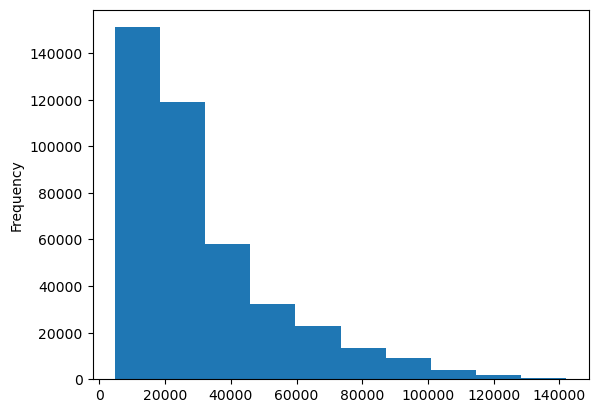

In [7]:
# set up plot to take a look easy can make in any style to make it easy to read data

df.SalePrice.plot.hist()

Note**Time Series need as much information to be encoded in thr dates as possible.**

encoding เป็นกระบวนการวางลำดับของตัวอักษร ตัวอักษร ตัวเลข เครื่องหมาย และสัญลักษณ์ เข้าสู่ฟอร์แมตพิเศษสำหรับการส่งผ่านที่มีประสิทธิภาพหรือจัดเก็บ decoding เป็นกระบวนการตรงข้าม การแปลงของรูปแบบ encode กลับไปยังลำดับดั้งเดิมของตัวอักษร

### Parsing date (การแยกวิเคราะห์)

When work with Time Series data, we want to enrich the time &date component as much as posible.


we can do that  by pandas , by use our date columns `in paese_date` parameter

saledate is dtype object ,M8[ns == datetime64[ns] 

In [27]:
#import date again but this time with parse_dates



df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False,
                parse_dates=["saledate"]) #use parde_dates and select columns date 

In [28]:
df.saledate.dtype

dtype('<M8[ns]')

In [10]:
# after use parse_date it will change style to yy-mm-dd . if we donn't convert by parse_date it will be mm-dd-yy
df.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

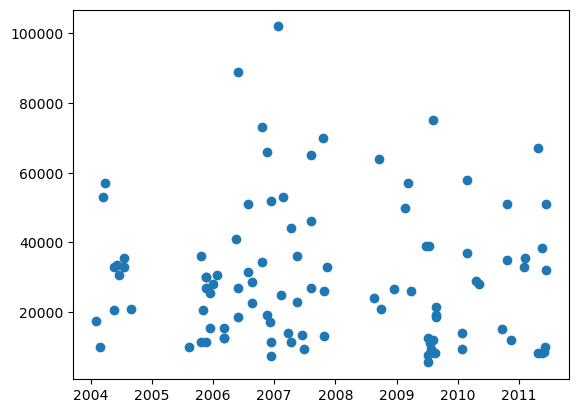

In [11]:
# After convert the date because the first scatter can not fit date on plot so let do plot again

fig, ax = plt.subplots()
ax.scatter(df['saledate'][:100],df["SalePrice"][:100]) 

In [12]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# See all column

df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [14]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

## Sort DataFrame by saledate

when work with Time serie data , It's good idea to sort it by date

In [15]:
# Sort DtaFrame in date order df.sort_values(by=["any column that is in number, we need"], inplace=True, ascending=True)

df.sort_values(by=["saledate"], inplace=True, ascending=True) #inplace =True(make it in order),ascending=True(from small to big)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [16]:
#check the index of row
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


## Make a copy of the original DataFrame

Make a copy so when we manipulate the copy, we still got our original data.

In [29]:
# Make a copy of the original DataFrame to perform edits on

df_tmp = df.copy()

# 4. Feature enginerring = creating a new feature example:



## Add pandas datetime parameters for `saledate` column : turn our column datetime into a date time index 
https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DatetimeIndex.html



In [30]:
#Access date time by use `dt` to access the year to see


df_tmp[:2].saledate.dt.year


0    2006
1    2004
Name: saledate, dtype: int64

Create a new columns by use name from this attribute : https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DatetimeIndex.html

### **We created saleyear, salemonth, saleOfDay..etc by extracted some value from saledate, and Add more  feature on the back of dataframe**

In [31]:
# Create a new columns by use name from this attribute
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek# dayofweek attribute
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear # look at attibute dayofyear on webside


In [32]:
# check if new columns alread add to dataframe

df_tmp.tail().T

,412693,412694,412695,412696,412697
SalesID,6333344,6333345,6333347,6333348,6333349
SalePrice,10000.0,10500.0,12500.0,10000.0,13000.0
MachineID,1919201,1882122,1944213,1794518,1944743
ModelID,21435,21436,21435,21435,21436
datasource,149,149,149,149,149
auctioneerID,2.0,2.0,2.0,2.0,2.0
YearMade,2005,2005,2005,2006,2006
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2012-03-07 00:00:00,2012-01-28 00:00:00,2012-01-28 00:00:00,2012-03-07 00:00:00,2012-01-28 00:00:00


Note: If we want to share this to our team we need to add the detail of new column on our data dictionary or anything that we can let team see the same changed

In [33]:
# After we enrich our datafame with data time features, we can remove `saledate`

df_tmp.drop("saledate",axis=1, inplace=True)


#use inplace=True , so we don't have to go whole code' df_tem = df_tmp.drop("saledate",axis=1, inplace=True)''

In [34]:
#check the value of the differnt column by use value_counts()

df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

# 5. Modelling

Strat some model-driven EDA.

 **Note we tring to use all the indeoendent variable to predict sale price so, we need to drop all SalePrice column and that going to be X , We use sale price that column shoud be our Y.**

In [35]:
# Let's build a machine learning model

# 1. import tool incase we didn't set up for the beginning
from sklearn.ensemble import RandomForestRegressor

# 2. assinged model
# n_jobs = -1 mean going to usw as many cores as possible on my computer because we dealing with 412,00 rows and ML try to calculate price
model = RandomForestRegressor(n_jobs = -1,#-1 means using all processors
                             random_state=42)# this is same as  np.random.seed(42)

# 3. fit model with combine x , y in the same code in here
model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp.SalePrice) # from x = df_tmp.drop("SalePrice",axis=1), y = df_tmp["SalePrice"]

ValueError: could not convert string to float: 'Low'

In [36]:
### Model set up won't work because it have non numberical, string and missing value data

df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [37]:
# Check what is object in UsageBand = So Its String . indata some of object is string
df_tmp["UsageBand"].dtype

dtype('O')

In [38]:
# Check how much missing data

df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Convert string to Categories by Pandas

One way we can turn all of our data into numbers is by converting them into pandas catagories

ckeck different datatype compatible with pandas https://pandas.pydata.org/pandas-docs/version/1.4/reference/general_utility_functions.html


You can use either OneHot or pd.categories.

OneHot will be more useful when using sklearn pipelines: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

I'd practice using each and see which one works better for your workflows.

In [39]:
#reminding data

df_tmp.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
fiModelDesc,521D,950FII,226,PC120-6E,S175


In [40]:
# Use one of API types(use string one in this case) to check type of data

import pandas as pd
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [41]:
#Find the columns which contain strings in our datafeame. indata some of object is string

#label = key , content = value in our data, this is base pn the documentation 
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [42]:
# For Loop reminding if we wondering what df.items() and loop does

random_dict = {"key1": "Hi",
              "key2": "barbies"}
for key, value in random_dict.items():
    print(f"this is a key:{key}",
         f"this is a value:{value}")

this is a key:key1 this is a value:Hi
this is a key:key2 this is a value:barbies


##  Loop to find which one contrain string and turn all of the string value into category values in Pandas

https://pandas.pydata.org/pandas-docs/version/1.4/reference/general_utility_functions.html


In [43]:
#This will turn all of the string value into category values in Pandas

for label, content in df_tmp.items():#loop keys and value in data
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered() #keep column or access label = and  astype (mean change) to category in order.
        
#astype = change, as_ordered = inorder li a ,b ,c ,d

In [44]:
# check if object that was string change to category already()
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [45]:
# after change some object to category. cat = category
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

**note: it does still look like string but pandas treat it like number 1,2,3**

In [46]:
# we can check on if pandas trast it like in oder of number instaed of 'string'

# use category.codes . to access state in their numerical value
df_tmp.state.cat.codes

0          0
1         32
2         31
3         43
4         31
          ..
412693    43
412694     8
412695     8
412696    43
412697     8
Length: 412698, dtype: int8

In [47]:
## `Note: still a lot of missing data`
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

**If in the real project 0.92 % missing data , or a lot of missing data we need to ask client about it. (but since it free from kaggle)**

## Save preprocesses data

After we made some changed some in df_tmp so let save it,so we'll save it to a new CSV so we can.If we were to just start this notebook from Fresh, we can just import our manipulated data frame and start exactly where we are now.

In [48]:
#Export current tmp dataframe

# can be save on each stage of process depend on us
df_tmp.to_csv("data/bluebook-for-bulldozers/train_tmp.csv",
             index=False)

In [49]:
#Import preprocessed data , we also can do this whatever stage we at . โหลดกลับมาใหม่ตอนจะเริ่มงาน และassined ที่โหลดมาใส่ชื่อเดิม

df_tmp = pd.read_csv("data/bluebook-for-bulldozers/train_tmp.csv",
           low_memory=False)

df_tmp.head().T


,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
fiModelDesc,521D,950FII,226,PC120-6E,S175


In [ ]:
# Remiding a lot of value still missing

df_tmp.isna().sum()

# Fill missing value

##  Fill numerical ,missing values first (เติมข้อตัวเลขของคอลัมที่ว่างในคอลัม ที่เป็นเฉพาะตัวเลข)
https://pandas.pydata.org/pandas-docs/version/1.4/reference/api/pandas.api.types.is_numeric_dtype.html#pandas.api.types.is_numeric_dtype

In [ ]:
# step 1 . check first whcih one is numeric

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

In [50]:
# check out one of the list above if they contain in the right thing

df_tmp.ModelID

0          3157
1            77
2          7009
3           332
4         17311
          ...  
412693    21435
412694    21436
412695    21435
412696    21435
412697    21436
Name: ModelID, Length: 412698, dtype: int64

### For loop check which one is numeric and missing value(null)

In [51]:
# step 2. Check for, which numeric column have null values by use pandas.isnull()

for label, content in df_tmp.items():#loop keys and value in data
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():# if there no value in the content (aka columns) and we need to make sure we add.sum()
            print(label)
        
        
        #df_tmp[label] = content.filled("na").cat.as_ordered()

auctioneerID
MachineHoursCurrentMeter


### *For loop work-flow Find missing and adding Median to missing value

In [52]:
# Step 3. Fill the no value  with median

for label, content in df_tmp.items():#loop keys and value in data
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric value with median
            df_tmp[label] = content.fillna(content.median()) # we donn't use mean because when we have a lot differnt values in this case we have 412,000 value of mean can be vary sensitive


            
            
# we donn't use mean because when we have a lot differnt values in this case we have 412,000 value of mean can be vary sensitive
            

In [53]:
# example Domonstatrate how median is more robust than mean in big data
hundreds = np.full((1000,),100)
hundreds_billion = np.append(hundreds, 1000000000)
np.mean(hundreds) , np.mean(hundreds_billion) , np.median(hundreds), np.median(hundreds_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

In [54]:
# step 4. Checl if there is any null numeric value after filled it

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [55]:
# 4.1 Check to see how many example were missing
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [56]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

# Filling and tuning categorical variables into numbers

we still have a lot of missing value from non-numeric 

In [57]:
# Check for columns which aren't numeric by use `if not` in For Loop

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
            print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [58]:
# Check on some of it what type it if it none numberic

pd.Categorical(df_tmp["Transmission"])# so this is categories,or we can add .dtype after

[NaN, NaN, NaN, NaN, NaN, ..., NaN, NaN, NaN, NaN, NaN]
Length: 412698
Categories (8, object): ['AutoShift', 'Autoshift', 'Direct Drive', 'Hydrostatic', 'None or Unspecified', 'Powershift', 'Powershuttle', 'Standard']

### Turn Categorical variables into  to number by .codes

In [59]:
# Step 1. turn all of it to number by use .codes + 1

pd.Categorical(df_tmp["Transmission"]).codes +1

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

the way PANDAS categories works is it automatically if there was some missing value in here,it assigns that a code of negative one.But we don't want that so we needed to + 1 when we filling missin value in code or for loop

In [60]:
# step 2. filling missing data in categories into number by For  Loop

# Turn all categorical variable of the list none numeric into number and fill missing

for label, content in df_tmp.items():# step 1. put key(label), and value (content) we know because document mentioned
    if not pd.api.types.is_numeric_dtype(content):
            # Add binary column to indicate whather sample had missing value.it will return true 1 or fales 0
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            #Turn Categories into number and add +1 because pandas auto -1 into missing value and we don't want it
            df_tmp[label] = pd.Categorical(content).codes + 1

In [61]:
# check again

df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [62]:
# Check if there still some missing value
df_tmp.isna().sum()[:10]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
dtype: int64

** After all values turned to numberical now we can fit Model that we create earier**

# Redo - 5. Modelling
Strat some model-driven EDA.

Note we tryng to use all the indeoendent variable to predict sale price so, we need to drop all SalePrice column and that going to be X , We use sale price that column shoud be our Y.

As a data scientist, as a machine learning engineer, is to do as many experiments as fast as possible.If we're training models on all of the data all the time, it's going to take a fairly long time.So we are just going to demonstrate how long it takes forcomputer to use a baseline randomforest regression model to find all the patterns in all 412,000 rows.


Important:

1. How can we reduce the amount of time it takes between my experiments. 
2. %%time need to be the first senten on cell , can not have any comment on top.


### Model work flow

In [63]:
%%time
# Set up Jupyter notebook  magic funtion on the fisrt thing on cell. This is calculate how much time this particular cell takes to run


# Let's build a machine learning model

# 1. import tool incase we didn't set up for the beginning
from sklearn.ensemble import RandomForestRegressor

# 2. assinged model
# n_jobs = -1 mean going to usw as many cores as possible on my computer because we dealing with 412,00 rows and ML try to calculate price
model = RandomForestRegressor(n_jobs = -1,#-1 means using all processors
                             random_state=42)# this is same as  np.random.seed(42)

# 3. fit model with combine x , y in the same code in here
model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"]) # from x = df_tmp.drop("SalePrice",axis=1), y = df_tmp["SalePrice"]

CPU times: user 17min 9s, sys: 11.6 s, total: 17min 20s
Wall time: 4min 17s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [64]:
# Score the model with data that model seen before

# we score from the data x_train =df_tmp.drop("SalePrice",axis=1) , y_train = df_tmp["SalePrice"]

model.score(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"]) # we score from the data that we trained , x_train =df_tmp.drop("SalePrice",axis=1)

0.9875471593700775

**Qustion:** Why doesn't the above metric hold water?(why isn't the metric reliable)

#  Splitting data into train/validation set

**Based on document year that mention Train.csv 2011, so we will splitting data by year-sale, and Valid.csv jan 1,2012-Apr 30,2012:

- We wont worry about test set on this split because there in seperate data set.The reason we are only working on train and valis CSV because we Imported it train and valid CSV and alreat start of the notebook of that file alredy.


In [65]:
## We use saleYear to help on split data so check o it first

df_tmp.saleYear


0         2006
1         2004
2         2004
3         2011
4         2009
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [66]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

**Document Key:**

- Train.csv is the training set, which contains data through the end of 2011.

- Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

In [67]:
# Split data into training and validation 

# step 1. split validation set, by use saleYear 2012
df_val = df_tmp[df_tmp.saleYear == 2012]

#Step 2. split train set by use saleYear that not equal 2011
df_train = df_tmp[df_tmp.saleYear != 2012 ]

len(df_val), len(df_train)

(11573, 401125)

In [68]:
#Split data into x & y

# Create x ,y 
x_train, y_train = df_train.drop("SalePrice",axis=1), df_train.SalePrice
x_valid, y_valid = df_val.drop("SalePrice",axis=1), df_val.SalePrice

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [69]:
#cheak on data
y_train

0         66000.0
1         57000.0
2         10000.0
3         38500.0
4         11000.0
           ...   
401120    10500.0
401121    11000.0
401122    11500.0
401123     9000.0
401124     7750.0
Name: SalePrice, Length: 401125, dtype: float64

# Custom an Evaluation funtion 

(Base on this project spcific RMSLE requiment )

**MAE mean absolute error**:
- You make predictions on all the examples and then you minus your predictions from your actual values and take the average. 
- MAE is the average of the absolute differennces between predictions ans actual values.

**Means quares log error MSLE:**
- main squared log error is more to do with the ratio and most often times with regression problems,


**Note** : reserch by "sklearn evaluatiom metrics" than use the similar one MSLE and start custom from that https://scikit-learn.org/stable/modules/model_evaluation.html


###  Work-flow 1. (for Loop all Model into one Funtion)

In [71]:
# create evaluation funtion (the requiment = RMSLE)

#1. import metrics that we going to use and add MAE for help
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score


#2. creat funtion that we want (rmsle), and pass y_test and y_preds
def rmsle(y_test, y_preds):
    """
    calculate root mean squared log error between prediction and true labels
    """
    # 3. return funtion that we create use np root to complate RMSLE function 
    return np.sqrt(mean_squared_log_error(y_test, y_preds))#put np.sqrt so it will be rmsle

#Create funtion to evalute model on a few different levels

#1. pass our model into this show_score fuction it auto fit y_true and y preds in one line code for us
def show_scores(model):
    # 2. make prediction on training, so evaluate how well our model did on training data set
    train_preds = model.predict(x_train)
    # 3. make prediction on valid,how well our model did on validation data 
    val_preds = model.predict(x_valid) 
    # 4. create Variable to do all perdiction from our metrics with our y_preds for val_preds  and train_preds
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),#use y_ture,y_preds
            "valid MAE": mean_absolute_error(y_valid, val_preds),#use y_ture,y_preds
            "Training RMSLE": rmsle(y_train, train_preds),#use the function that we custom with y_true , y_preds
            "Valid RMSLE": rmsle(y_valid, val_preds),
            "Trining r^2" : r2_score(y_train, train_preds),# use r2 with y_true , y_preds
             "valid r^2" : r2_score(y_valid, val_preds)
            }
    # 5. Return score from our metrics above that we fit y_true , y_preds in funtion 
    return scores

`**IF OUR MODEL perform better in validation data a lot higher that thaing data set = our model over fitting**`

## Testing our model on a subset(to turn the hyperarameters)

In [ ]:
#%%time

# This takes too long....for experimenting 1.30 mins because we have 401125 data set

#model = RandomForestRegressor(n_jobs=-1,random_state =42)

#model.fit(x_train,y_train)

**Speed up our time between experiment by testing model on subset like this**

model.fit(x_train[:10000],y_train[:1000])

In [72]:
# Cahnge Max_samples value , by use max_sample =  the amount of sample  it will run faster in experiment

# n_estimators defualt = 100
model = RandomForestRegressor(n_jobs= -1,
                             random_state = 42,
                             max_samples = 10000) # adjust amount that we want in max_sample. (n_estimato 100*10000)


In [73]:
# explain what max_sample

x_train.shape[0] # this is how many data total. which is mean * n_estimator 401125*100 = too much

401125

In [74]:
%%time
# cuting down on the max number of sample each estimator can see improve

model.fit(x_train,y_train)

CPU times: user 22.9 s, sys: 346 ms, total: 23.3 s
Wall time: 3.54 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

###  Now try to use max_samples = 10000 that we set up early with our function show scores that we create

In [75]:
# Bring it from above that we create

show_scores(model) # call show_scores(model) from work-flow 1 that we careted

{'Training MAE': 5554.061618822063,
 'valid MAE': 7139.615822172297,
 'Training RMSLE': 0.25758465681614984,
 'Valid RMSLE': 0.29248380187626777,
 'Trining r^2': 0.8608402371243158,
 'valid r^2': 0.83308596217853}

Our Valid RMSLE still 100 from the rang which is 0.293 and our model trainfaster

# Hyperparameter tuning with RandomizedSearchCV

RandomizedSearchCV = create grid dictionary of param to find best params and than use best params on GridSearchCV


### Work-flow 2 (create grid ,fit for RandomizedSearchCV model)


In [76]:
%%time
from sklearn.model_selection import RandomizedSearchCV


#  step 1. Create grid for different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10,100,5),
           "max_depth": [None,1,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,50,2),
            "max_features" : [0.5, 1, "sqrt", "auto"],
          "max_samples": [10000]} # we pur max sample becuase it faster than tuning the whole data

# step 2 Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                          param_distributions = rf_grid,
                          n_iter = 30,#we going to try 20 different combinations on data if we set high it will take long time. so we normally run in lunch break
                          cv= 5,#the more is it more slow when 
                          verbose = True)#It's going to output a few thing

# Fit the RandomixedSearchCV model
rs_model.fit(x_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_con

CPU times: user 48.2 s, sys: 14.8 s, total: 1min 3s
Wall time: 2min 19s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=30,
                   param_distributions={'max_depth': [None, 1, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95])},
                   verbose=True)


What this is going to do, it's going to fit two iterations.

So randomized search is going to pick two different combinations of parameters from here, assign them

to our random forest or aggressor and then fit it to the training data.

And remember, it's only on 10,000 samples

In [77]:
# Find the best model hyperpameters (from work flow above with a few combination. it might not be the best cuz not the whold data)
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 18,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [78]:
# Evalaute the RandomizedSearchCV model with passing the best hyperparameter into model

show_scores(rs_model)

{'Training MAE': 6213.142584936943,
 'valid MAE': 7587.666471744134,
 'Training RMSLE': 0.28090450438474285,
 'Valid RMSLE': 0.30695494008259144,
 'Trining r^2': 0.8279644363700712,
 'valid r^2': 0.8105744073937448}

**Sometime we put n_iter = 100 it will take 2 hours. We we do in lunch break and come back.**

## Train a model with the best hyperparameters

**Note:** these were found after 100 iterations of `RandomizedSearchCV`. With subset 10000 sample by Danile. And we got the best param to turn with full data




### Ideal -model Work 3.  flow with best param that we got 
Note :if running randomized search's number of times more than what we've done above (1min 9s) you may potentially find different parameters to what Danile has found.

In [79]:
%%time


# create new ideal  model to try wit best  hyperparammeters. IF
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,# None= use all data or as much as possible
                                   random_state=42)

# fit the ideal model

ideal_model.fit(x_train,y_train)

CPU times: user 2min 35s, sys: 1.14 s, total: 2min 36s
Wall time: 29.5 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

# Our best model  is  " ideal_model " than we can use this model to apply after this process on each step

In [80]:
# Check score for ideal_model (trained on all the data)by call function show_scores() from the beginnning

show_scores(ideal_model)# this will pass all the model that we just train


{'Training MAE': 2951.123355082265,
 'valid MAE': 5966.934781951541,
 'Training RMSLE': 0.144427431435229,
 'Valid RMSLE': 0.246251621813037,
 'Trining r^2': 0.9589090179371786,
 'valid r^2': 0.8819835895768973}

**We are looking at Valid RMSLE 0.245 for this project since Client it spacific what it**

In [81]:
# Score on rs_model (trained on 10000 example data) to comparee
show_scores(rs_model)

{'Training MAE': 6213.142584936943,
 'valid MAE': 7587.666471744134,
 'Training RMSLE': 0.28090450438474285,
 'Valid RMSLE': 0.30695494008259144,
 'Trining r^2': 0.8279644363700712,
 'valid r^2': 0.8105744073937448}

#After get the best  score

**Evaluation**

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

Sample submission files can be downloaded from the data page. Submission files should be formatted as follows:

- Have a header: "SalesID,SalePrice"
- Contain two columns
    -SalesID: SalesID for the validation set in sorted order
    -SalePrice: Your predicted price of the sale

**Action :** So that's what we probably might do.Now we might import the test data set and formatted in a way so we can use our machine learning model.on it and create an example submission in the format that Kaggle is asking of us.



# # Make predictioon on test data

In [82]:
# Make predictioon on test data. (Test.csv file for this project)


# step 1 improt test data (This time missing the sale pricr colimn because we are trying to predict it)
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                     low_memory=False,
                     parse_dates = ["saledate"]) # convert saledate to format yy-mm-dd becuse we haven't done any manipulate for test data

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [83]:
#Make prediction on the test dataset


# pass whole data frame because it will be x value ,we don't needed to drop any column since the data doesn;t have saleprice on it 
test_preds  = ideal_model.predict(df_test)# pass whole data becuse data doesn’t have saleprice column so it it = x_test

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...


**Code won't work becuse we needed to manipulate data to numberical as we did on trained dataset. So re-do whold process with test dataset** In this case df_test and x_train has differnt number of column


# Preprocessing the data (getting the test dataset in the same fromat as our training dataset)

In [84]:
# Code didn’t work so check on it is it still have missing value on this test data set
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [85]:
#check on data column  and x_train , so after look column is differnt .
df_test.columns #df_test has 52 column

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [86]:
# check x_train column

x_train.columns # x_train has 102 column??

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

**Error note :** So the reason why our machine learning model can't predict on the test data set at the moment is because .it's not in the same format as the model was trained on or as the data set the model was trained on.

## Build funtion instead of manipulate data one by ine step so collating a whole bunch of different stepa into function and just call a funtion

### work-flow create function to tranfom data VDO 196

## My note
# Create function by take those function that we did on training data so do the same thing as test data

# step 1 . create a function df not df_test becuase we can use this function with a coubple model
def preprocess_data(df):
    """
    Preprocess tranformations on df and return transformed df.
    """
#fill in all transformations that we did on traing set in here    
    # Create a new columns by use name from this attribute to add information based on saledate column to dataset
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek# dayofweek attribute
    df["saleDayOfYear"] = dft.saledate.dt.dayofyear # look at attibute dayofyear on webside
    #after done it we drop saledate column
    df.drop("saledate",axis=1,inplace=True)
   
    # step 2. fill the numeric rows with the median
    for label, content in df.items():#loop keys and value in data
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric value with median
                df[label] = content.fillna(content.median()) # we donn't use mean because when we have a lot differnt values in this case we have 412,000 value of mean can be vary sensitive
   
        # step 3. fill categorical missing data turn categories into numbers. No need another loop cus we use the same Loop above
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the categories code because pandas encode missing value in category as -1
            df[label] = pd.Categorical(content).codes+1 #mean turn into categorical category and turn to number ny use codes 
                
    return df

In [87]:
def preprocess_data(df):
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek# dayofweek attribute
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df


### After rub function if it show no attribute fo and reloading cvs file
Question: Where would this function break?

Hint: What if the test data had different missing values to the training data?

Now we've got a function for preprocessing data, let's preprocess the test dataset into the same format as our training dataset.

In [88]:
# Process the test data into transfomer function that we crete 
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [89]:
print(df_test.columns)


Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=101)


In [90]:
x_train.head()


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1139246,999089,3157,121,3.0,2004,68.0,2,963,298,...,True,True,True,True,True,True,True,True,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,2,1745,529,...,True,True,True,True,True,True,True,True,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,1,336,111,...,True,True,True,True,True,True,True,True,True,True
3,1139251,1026470,332,121,3.0,2001,3486.0,1,3716,1381,...,True,True,True,True,True,True,True,True,True,True
4,1139253,1057373,17311,121,3.0,2007,722.0,3,4261,1538,...,True,True,True,True,True,True,True,True,True,True


In [91]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


### We've found an error and it's because our test dataset (after preprocessing) has 101 columns where as, our training dataset (X_train) has 102 columns (after preprocessing).

Let's find the difference.

In [92]:
# We can find how the columns differ using python sets
set(x_train.columns) - set(df_test.columns) # this is going to tell us which columns incolrect

{'auctioneerID_is_missing'}

In [93]:
#Manually adjust df_test to have auctioneerID_is_missing column
df_test["auctioneerID_is_missing"] = False # Set it just False because had no missing value
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [94]:
#Predict again 
test_preds  = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [96]:
# How to Reorder columns in df_test to match the order in X_train. 
df_test = df_test[x_train.columns]

### If it show no index of such different column it maybe typo so this is how to fix it by rename

In [97]:

# Rename the columns in df_test to match the expected feature names

df_test.rename(columns={'saleDayofweek': 'saleDayOfWeek', 'saleDayofyear': 'saleDayOfYear'}, inplace=True)

In [98]:
# Finally after rename, Reorder we need to predict again after adjusted all of it


test_preds  = ideal_model.predict(df_test)

In [99]:
test_preds

array([17323.79069043, 17166.79798407, 51431.26491442, ...,
       12399.80794922, 16979.39675127, 27062.36886536])

## After made some preictiobs, if client , or team want it in spacific format example :

**Have a header: "SalesID,SalePrice"**

Contain two columns:
- SalesID: SalesID for the validation set in sorted order
- SalePrice: Your predicted price of the sale

www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

In [100]:
# Format prediction into the same format Kaggle is asking for 

#step 1. make emty dataframe
df_preds = pd.DataFrame()

#step 2. df_preds["SalesID"] is going to be salesID columns from df_test
df_preds["SalesID"] = df_test["SalesID"] 

#step 3 df_preds SalesPrice is going to be test_preds that we create from the model
df_preds["SalePrice"] = test_preds

#Take a look on it

df_preds

,SalesID,SalePrice
0,1227829,17323.790690
1,1227844,17166.797984
2,1227847,51431.264914
3,1227848,70764.995455
4,1227863,57971.058208
...,...,...
12452,6643171,42387.776009
12453,6643173,13221.150662
12454,6643184,12399.807949
12455,6643186,16979.396751


In [101]:
### Export prediction data to folder

df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv", index=False)


# Feature Importance

it seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable**, or in our case, the SalePrice

## If er share this to team some of them might be curious of which parts of the data led to these predictions

In [102]:
### find feature impoertance of our best model by use feature_importances_ 

ideal_model.feature_importances_ # This is will be the value of each features on our data 

array([3.34924470e-02, 1.64748353e-02, 4.47004352e-02, 1.69028377e-03,
       3.28858493e-03, 2.02782264e-01, 3.13875078e-03, 9.83191106e-04,
       4.15237625e-02, 4.07149610e-02, 6.61902591e-02, 5.09205417e-03,
       1.78327762e-02, 1.49841216e-01, 4.75075898e-02, 5.96117040e-03,
       2.83186429e-03, 4.15283561e-03, 3.46774099e-03, 6.85760750e-02,
       6.46055813e-04, 8.22926053e-05, 7.84347964e-04, 2.50278281e-04,
       1.07596596e-03, 3.10663583e-04, 2.81785595e-03, 8.33504813e-03,
       8.27324018e-04, 2.31225006e-03, 3.67230453e-03, 8.23599337e-04,
       4.55895657e-03, 3.28528090e-04, 4.40520420e-03, 6.38225129e-03,
       8.20417927e-04, 1.21731513e-02, 2.59122437e-03, 2.22091122e-03,
       1.77194684e-03, 9.70894732e-04, 3.71483557e-03, 6.29108698e-04,
       4.29867961e-04, 3.51248285e-04, 6.65265644e-04, 1.64121118e-03,
       1.20260513e-03, 2.31213148e-04, 3.35331494e-04, 7.34100766e-02,
       3.76162877e-03, 5.65047051e-03, 2.90594983e-03, 9.92965774e-03,
      

In [103]:
# This is has 102 value of our feature_importances

len(ideal_model.feature_importances_)

102

In [104]:
# checj ehat in have commonn with our training data set

x_train.shape # have 102 columns and ideal_model has 102 values on feature importance

(401125, 102)

In [105]:
# Help function for plotting feature importances . plotting thoes value into grapht

#step1 take a list of columns , and list of importances , n=20 becaue we want a top 20 from a value of feature
def plot_features(columns, importances, n=20): 
    # step 2 create a data frame here with 3 pandas step inone
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    # step 3 Plot the dataframe from the scrtch 
    fig, ax =plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20]) #plotting features is look better in horizontal bar. We only want up to n (it going to be the frist 20 example)
    ax.set_ylabel("Features")#add comunicate
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis() # invert most value on the top of grap
    

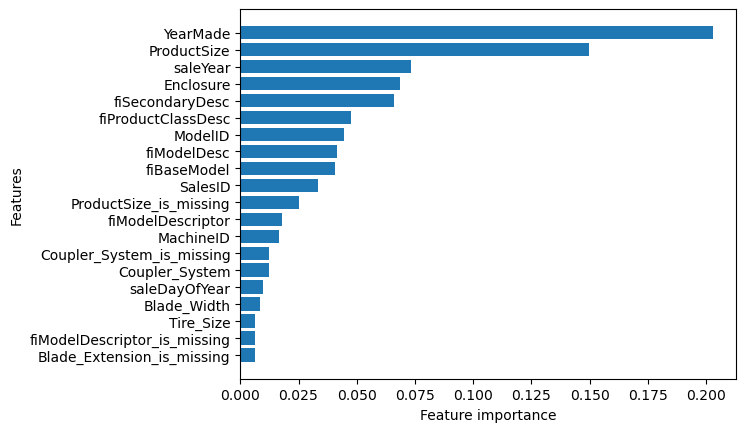

In [106]:
# Call the function that we just crate above

# we want column 102 from x_train because it aviable there. and get feature_importance_ best model

plot_features(x_train.columns, ideal_model.feature_importances_)



`**This is the most important feature our model has found.we need a need to figure out what these different values might mean.But this is the kind of exploration you probably do towards the end of after you've built a model.Right.Is bringing this to someone, after you've made some predictions, you might take this in a sort of
a presentation.**`

In [107]:
# Take a look data from graph
x_train["ProductSize"].value_counts() # 0 gonna be missing. this is not tellinf us  lot

0    210775
4     62274
3     49678
6     26494
5     24840
2     20975
1      6089
Name: ProductSize, dtype: int64

In [108]:
#check on our original dataframe
df["ProductSize"].value_counts()

Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: ProductSize, dtype: int64

**Productsize is in influencing the salePrice , saleYear,enclosure


**Question to finish:** Why might knowing the feature importances of a trained machine learning model be helpful?

Final challenge/extension: What other machine learning models could you try on our dataset? Hint: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html check out the regression section of this map, or try to look at something like CatBoost.ai or XGBooost.ai.


**Deploy model** : https://www.youtube.com/watch?v=fw6NMQrYc6w strat at 18.00